# Prolem Statement

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# UNDERSTAND DATASET

In [2]:
data= pd.read_csv("creditcard.csv")

In [3]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

V1, V2, V3,..., V28 are PCA applied features and rest i.e., 'time', 'amount' and 'class' are non-PCA applied features. Time Time in seconds to specify the elapses between the current transaction and first transaction.

In [4]:
data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Missing Values

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

From above information, dataset do not contain any missing value

# Distribution of Legit transaction and fraudulent transaction

In [9]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

* From above information, we came to know that this dataset is highly unbalanced 
* 0---> Normal Transaction 
* 1---> Fraudulent Transaction 

# Separating Values

In [10]:
normal= data[data.Class==0]
fraud= data[data.Class==1]

In [11]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [12]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Compare the values for both transactions

In [15]:
data.groupby("Class").mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

# Unbalanced Dataset Treatment

For the treatment of unbalanced dataset we are using undersampling where there is the removal of majority class data points to balance the target class distribution and build a sample dataset containing  similar  distribution of  normal transactios and fraudulent transactions. We used undersampling here as we have a large dataset.

In [16]:
normal_sample= normal.sample(n=492)

In [17]:
normal_sample

Time        V1        V2        V3        V4        V5        V6  \
1556      1221.0 -0.510937 -0.848016  0.744595 -1.653409 -0.060183 -0.020630   
28759    35145.0  1.572441 -1.213639 -1.153023 -2.500236  0.979841  3.235834   
219820  141896.0 -0.341198  0.702391  0.116490  0.229854  0.855474 -0.409260   
188244  127888.0 -0.508724  0.433482 -0.813732 -0.368391 -0.423183  0.081716   
143274   85240.0 -0.715666  1.223385  0.547016 -0.259550  0.339316  0.254357   
...          ...       ...       ...       ...       ...       ...       ...   
7727     10750.0  1.223846 -0.069178  0.650771  0.340673 -0.478564 -0.233920   
168943  119449.0 -0.447216  1.155126 -0.042259 -0.898478  0.660090 -0.630687   
63340    50670.0 -0.589761  1.166209  0.618559  3.421263 -0.796477  0.137051   
10358    16568.0 -0.966798  1.444677  1.934136  0.630253  0.067820 -0.986841   
163391  115897.0  0.517801  0.098338 -1.712058 -2.378777  1.290181 -1.581028   

              V7        V8        V9  ...       V21       V22       V23  \
1556   -0.243400  0.199897 -0.525795  ... -0.029935 -0.275043  0.046758   
28759  -1.485561  0.746395 -1.985077  ... -0.266291 -0.525249 -0.002477   
219820  0.476608  0.157390 -0.131951  ...  0.059472  0.263678 -0.389646   
188244  1.312459  0.163376  0.344833  ...  0.241999  0.846069  0.249963   
143274  0.154284  0.710193 -0.725259  ... -0.198687 -0.657139 -0.031359   
...          ...       ...       ...  ...       ...       ...       ...   
7727   -0.345152 -0.094604  2.005756  ... -0.234619 -0.124532 -0.020771   
168943  0.876060 -0.044412  0.027897  ... -0.294374 -0.532084  0.004053   
63340   0.413475  0.547966 -0.807117  ...  0.025101  0.009933  0.302293   
10358   0.596062 -0.271225  0.632452  ... -0.371697 -0.788173 -0.076091   
163391  1.399346 -0.650940 -1.297545  ...  0.641483  2.123231 -0.208154   

             V24       V25       V26       V27       V28  Amount  Class  
1556   -0.891883 -0.005773 -0.489827 -0.155354  0.022743   79.00      0  
28759   0.981843  0.548044 -0.191426  0.032333  0.014574   15.00      0  
219820 -0.581018 -0.039971  0.831552  0.092263  0.147818    1.00      0  
188244  0.636684 -0.349457 -0.323856 -0.004206 -0.014391  226.00      0  
143274 -0.907561 -0.131071  0.141047  0.127819  0.012797    9.99      0  
...          ...       ...       ...       ...       ...     ...    ...  
7727    0.137061  0.360667  1.101341 -0.074532 -0.009226    4.90      0  
168943 -0.403932 -0.349859  0.153137  0.469812  0.200081    1.78      0  
63340   0.273889 -0.164315  0.260292  0.171320  0.079123  151.37      0  
10358   0.633179  0.044612  0.160020 -0.012847  0.161948    0.89      0  
163391 -0.423965 -1.012521 -0.147159  0.337792  0.137428   10.00      0  

[492 rows x 31 columns]

# Concatenate Fraud data and Normal sample data

In [18]:
new_data=pd.concat([normal_sample, fraud],axis=0) 

In [19]:
new_data.head()

Time        V1        V2        V3        V4        V5        V6  \
1556      1221.0 -0.510937 -0.848016  0.744595 -1.653409 -0.060183 -0.020630   
28759    35145.0  1.572441 -1.213639 -1.153023 -2.500236  0.979841  3.235834   
219820  141896.0 -0.341198  0.702391  0.116490  0.229854  0.855474 -0.409260   
188244  127888.0 -0.508724  0.433482 -0.813732 -0.368391 -0.423183  0.081716   
143274   85240.0 -0.715666  1.223385  0.547016 -0.259550  0.339316  0.254357   

              V7        V8        V9  ...       V21       V22       V23  \
1556   -0.243400  0.199897 -0.525795  ... -0.029935 -0.275043  0.046758   
28759  -1.485561  0.746395 -1.985077  ... -0.266291 -0.525249 -0.002477   
219820  0.476608  0.157390 -0.131951  ...  0.059472  0.263678 -0.389646   
188244  1.312459  0.163376  0.344833  ...  0.241999  0.846069  0.249963   
143274  0.154284  0.710193 -0.725259  ... -0.198687 -0.657139 -0.031359   

             V24       V25       V26       V27       V28  Amount  Class  
1556   -0.891883 -0.005773 -0.489827 -0.155354  0.022743   79.00      0  
28759   0.981843  0.548044 -0.191426  0.032333  0.014574   15.00      0  
219820 -0.581018 -0.039971  0.831552  0.092263  0.147818    1.00      0  
188244  0.636684 -0.349457 -0.323856 -0.004206 -0.014391  226.00      0  
143274 -0.907561 -0.131071  0.141047  0.127819  0.012797    9.99      0  

[5 rows x 31 columns]

In [20]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [21]:
new_data.groupby("Class").mean()


Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94638.365854  0.059633 -0.025427 -0.035560 -0.147859  0.039575   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.005524 -0.138945 -0.063934 -0.018120  ...  0.001557 -0.010139   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.026574 -0.058275 -0.024936 -0.047278 -0.025335  0.021161  0.002514   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       84.062663  
1      122.211321  

[2 rows x 30 columns]

In [22]:
#


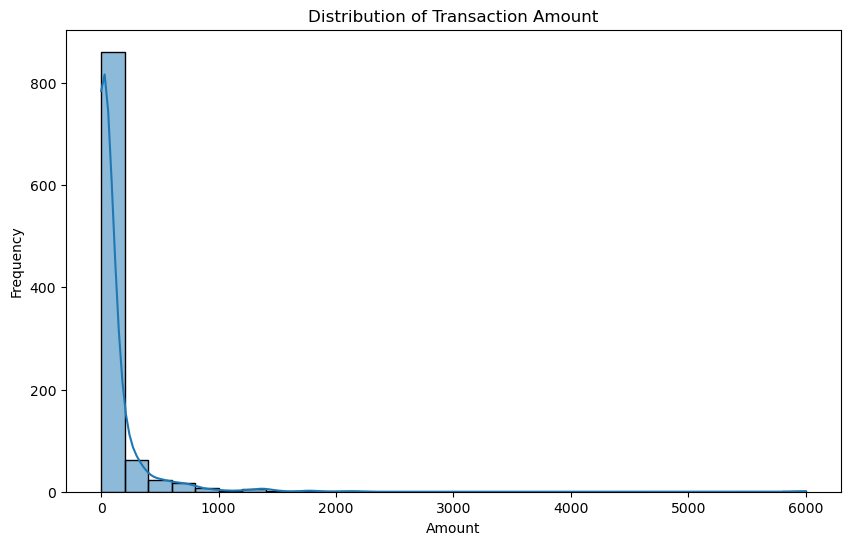

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

The visualization depicts the distribution of transaction amounts in the dataset. It shows a right-skewed distribution with a peak frequency observed around a specific value. This insight aids in understanding typical transaction behavior and identifying potential outliers or anomalies.

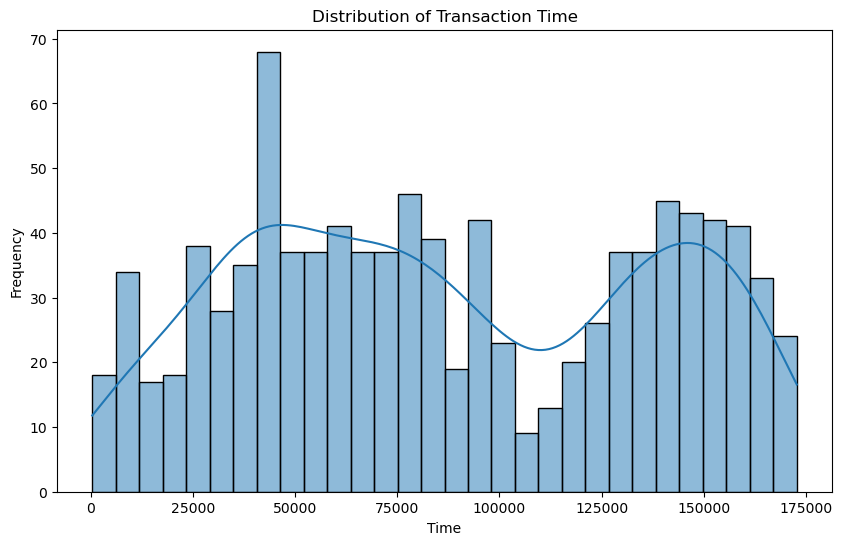

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Time'], bins=30, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates the distribution of transaction times. The wavy line indicates fluctuations in transaction frequency over time intervals, suggesting varying activity levels throughout the day. This insight helps identify peak transaction hours. Understanding transaction timing patterns is crucial for optimizing operations and detecting irregular behavior.

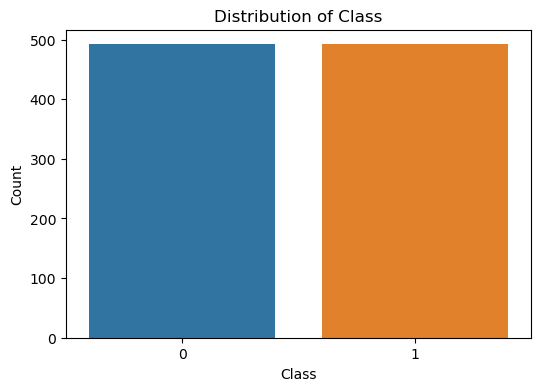

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_data)
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Dataset becomes highly balanced

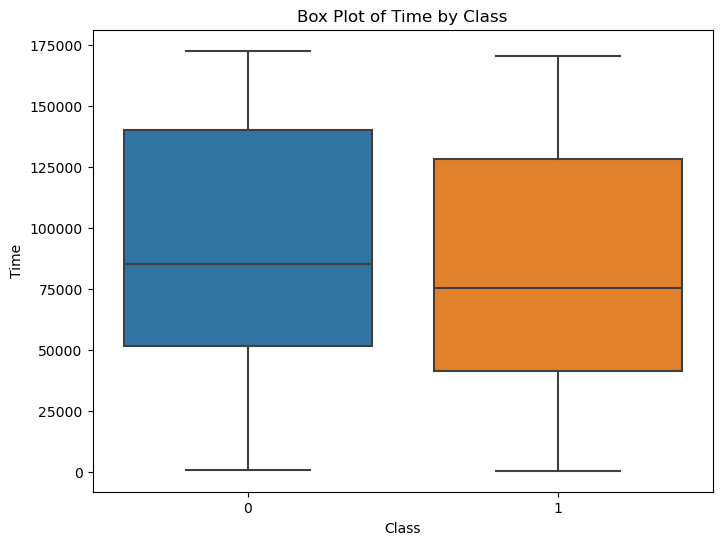

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Time', data=new_data)
plt.title('Box Plot of Time by Class')
plt.xlabel('Class')
plt.ylabel('Time')
plt.show()

There are no outliers present in time by class plot

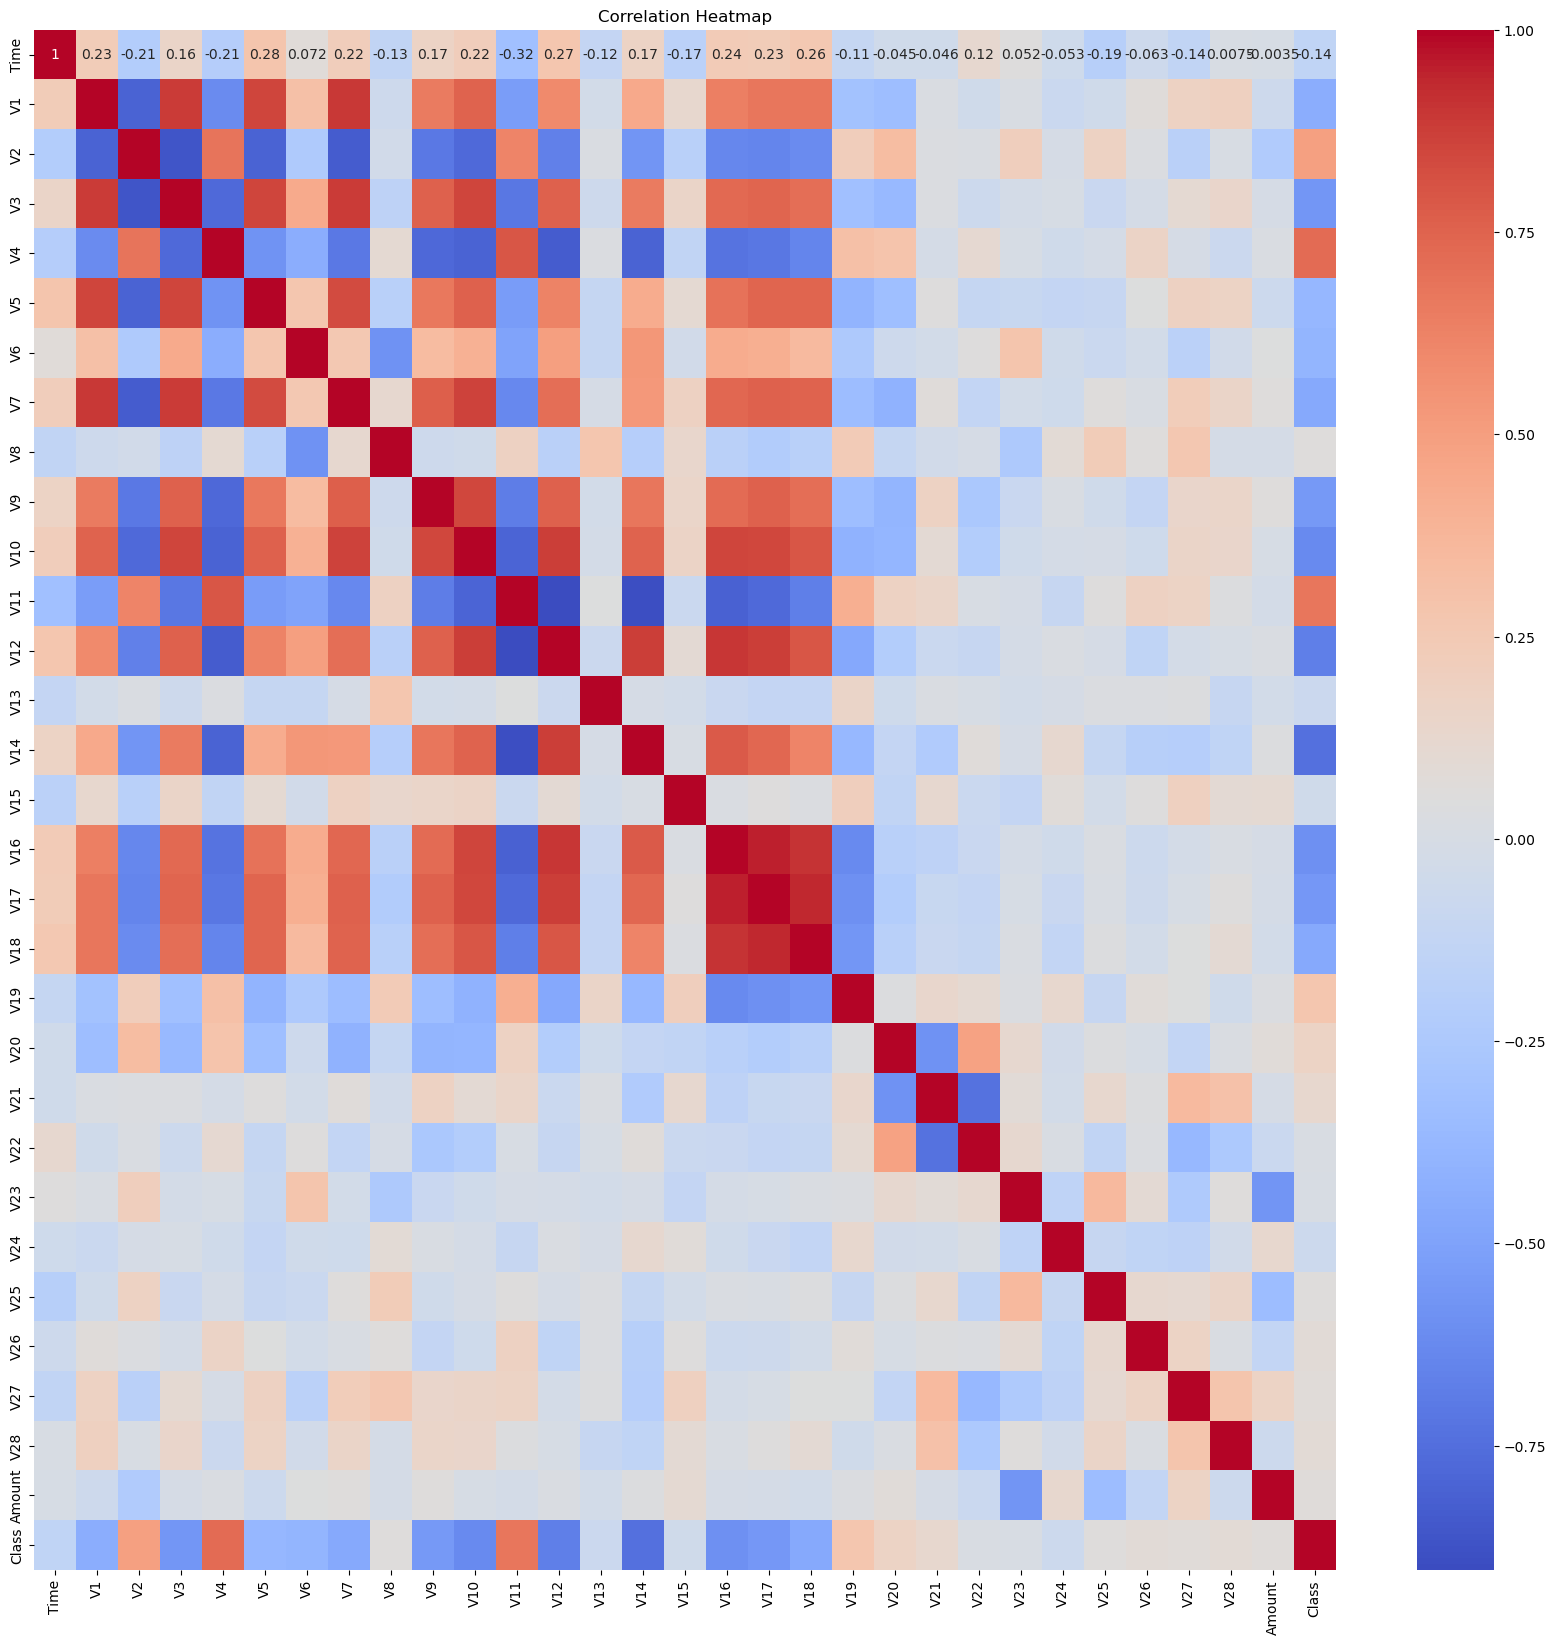

In [38]:
plt.figure(figsize=(21, 20))
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Encoding



There is no need of encoding as all the features are already in numeric state.

# Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(new_data)

In [44]:
new_data.dtype

dtype('float64')

# Splitting the data into features and target

In [45]:
x = new_data[:, :-1]
y = new_data[:, -1] 


In [46]:
x

array([[-1.76494337,  0.33356966, -0.71314293, ..., -0.2469225 ,
        -0.04009842, -0.0846614 ],
       [-1.07253166,  0.71019237, -0.81164053, ..., -0.06244796,
        -0.06013658, -0.30914378],
       [ 1.10632821,  0.3642542 , -0.29546955, ..., -0.00354309,
         0.26669329, -0.3582493 ],
       ...,
       [ 1.66670327,  0.30370465, -0.18125228, ...,  0.28428996,
         0.38085829, -0.08855476],
       [ 1.67925583, -0.13696852, -0.32686137, ...,  0.77550588,
        -0.71817695,  0.49758978],
       [ 1.68705271,  0.78603377, -0.44199809, ..., -0.09129096,
        -0.13343469, -0.21258128]])

In [47]:
y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

# Splitting Data into train and test data

In [49]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size= 0.3, random_state=123)

# Model Training

# Model1: Logistic Regression

In [50]:
logistic_reg = LogisticRegression()
logistic_reg.fit(xtrain, ytrain)
ypred_logistic = logistic_reg.predict(xtest)
accuracy_logistic = accuracy_score(ytest, ypred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:}")

Logistic Regression Accuracy: 0.9425675675675675


# Model2: KNN

In [51]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
y_pred_knn = knn.predict(xtest)
accuracy_knn = accuracy_score(ytest, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:}")

K-Nearest Neighbors Accuracy: 0.9087837837837838


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(ytest, y_pred_knn)

In [53]:
cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm)

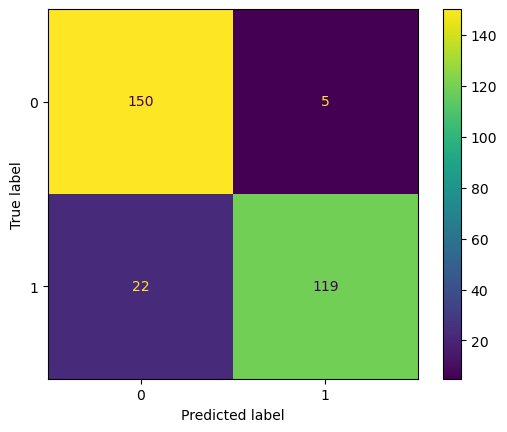

In [54]:
cm_disp.plot()

In [55]:
from sklearn.metrics import classification_report, accuracy_score, log_loss

In [56]:

target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(ytest,knn.predict(xtest),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.87      0.97      0.92       155
 Positive(1)       0.96      0.84      0.90       141

    accuracy                           0.91       296
   macro avg       0.92      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



In [58]:
accuracy_score(ytest, y_pred_knn)

0.9087837837837838

# Model3: Decision Tree

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred_tree = decision_tree.predict(xtest)
accuracy_tree = accuracy_score(ytest, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:}")

Decision Tree Accuracy: 0.8682432432432432


In [60]:
cm_dt= confusion_matrix(ytest, y_pred_tree)

In [61]:
cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm_dt)

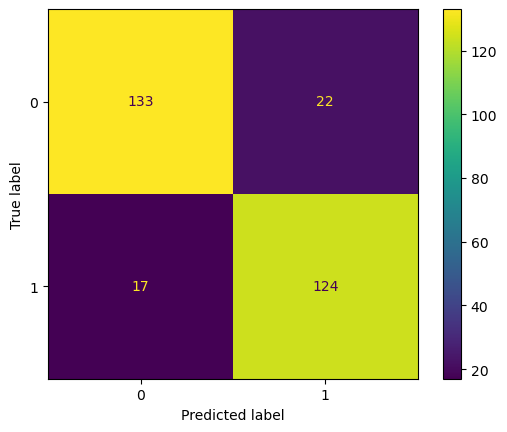

In [62]:
cm_disp.plot()

In [63]:
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(ytest,decision_tree.predict(xtest),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.89      0.86      0.87       155
 Positive(1)       0.85      0.88      0.86       141

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.87      0.87      0.87       296



In [65]:
accuracy_score(ytest, y_pred_tree)

0.8682432432432432

# Model4: Random Forest 

In [66]:
random_forest = RandomForestClassifier()
random_forest.fit(xtrain, ytrain)
y_pred_forest = random_forest.predict(xtest)
accuracy_forest = accuracy_score(ytest, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest:}")

Random Forest Accuracy: 0.9358108108108109


In [67]:
cm_rf= confusion_matrix(ytest, y_pred_forest)

In [68]:

cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm_rf)

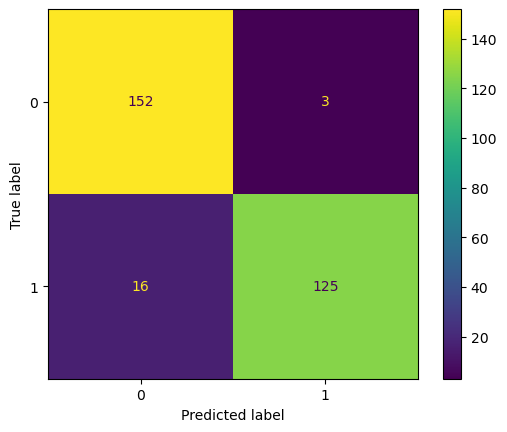

In [69]:
cm_disp.plot()

In [70]:
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(ytest,random_forest.predict(xtest),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.90      0.98      0.94       155
 Positive(1)       0.98      0.89      0.93       141

    accuracy                           0.94       296
   macro avg       0.94      0.93      0.94       296
weighted avg       0.94      0.94      0.94       296



In [71]:
accuracy_score(ytest, y_pred_forest)

0.9358108108108109

# Model5: SVM

In [72]:
svm = SVC()
svm.fit(xtrain, ytrain)
y_pred_svm = svm.predict(xtest)
accuracy_svm = accuracy_score(ytest, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:}")

SVM Accuracy: 0.9155405405405406


In [73]:
cm_svm= confusion_matrix(ytest, y_pred_svm)

In [74]:
cm_disp= ConfusionMatrixDisplay(confusion_matrix=cm_svm)

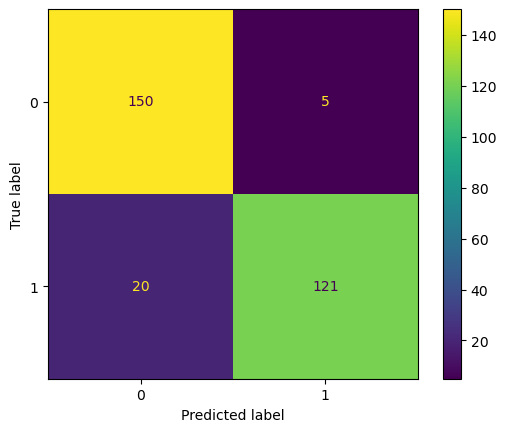

In [75]:
cm_disp.plot()

In [76]:
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(ytest,svm.predict(xtest),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.88      0.97      0.92       155
 Positive(1)       0.96      0.86      0.91       141

    accuracy                           0.92       296
   macro avg       0.92      0.91      0.91       296
weighted avg       0.92      0.92      0.92       296



In [77]:
accuracy_score(ytest, y_pred_svm)

0.9155405405405406

We are getting highest accuracy with Random Forest Algorithm. 

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [79]:
rf_model = RandomForestClassifier()

In [80]:
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],   # Number of features to consider at every split
    'max_depth': randint(10, 100),       # Maximum depth of the tree
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]           # Method of selecting samples for training each tree
}

In [81]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


In [82]:
random_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C9717EE50>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C9707C750>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C97911250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C976A34D0>},
                   random_state=42, verbose=2)

In [83]:
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 19, 'n_estimators': 397}


In [84]:
best_rf_model = random_search.best_estimator_

In [86]:
test_accuracy = best_rf_model.score(xtest, ytest)
print("Test Accuracy of the best model: {:.2f}%".format(test_accuracy * 100))

Test Accuracy of the best model: 93.58%


In [3]:
import pandas as pd
accuracy_scores = {
    'KNN': 0.91,
    'Logistic Regression': 0.94,
    'Decision Tree': 0.87,
    'Random Forest': 0.94,
    'SVM': 0.92
}

# Create a DataFrame from the accuracy scores dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy Score'])

In [4]:
print(accuracy_df)

                     Accuracy Score
KNN                            0.91
Logistic Regression            0.94
Decision Tree                  0.87
Random Forest                  0.94
SVM                            0.92


Hence Logistic Regression and Random Forest both are the best choosed model for the credit card fraud detection but we will pick random forest as its a part of ensembling learning that is why it will provide more accurate results.